<a href="https://colab.research.google.com/github/DivyaPokkunuri/Machine-Learning/blob/main/IRIS_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Author : **DIVYA POKKUNURI** 


Description: 
From the given ‘Iris’ dataset, predicting the optimum number of clusters
and representing it visually.

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## Importing the dataset

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
# See the first 5 rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


From above info we can say that our data is clean.

## Using the elbow method to find the optimal number of clusters

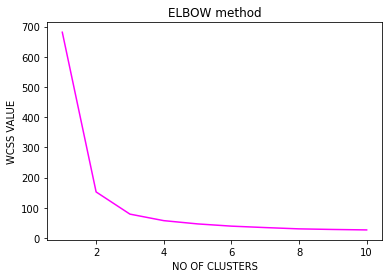

In [ ]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init= "k-means++", random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, color="magenta")
plt.title("ELBOW method")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("WCSS VALUE")
plt.show()


## Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters=3, init= "k-means++", random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Visualising the clusters

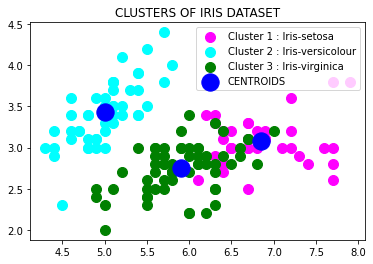

In [ ]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c="magenta", label = "Cluster 1 : Iris-setosa")
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c="cyan", label = "Cluster 2 : Iris-versicolour")
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c="green", label = "Cluster 3 : Iris-virginica")


plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=300, c="blue", label= "CENTROIDS")
plt.title("CLUSTERS OF IRIS DATASET")
plt.legend()
plt.show()